## EDA Lab - Brief Solution

> **Copyright Notice**    
> 
> This IPython notebook is part of the **Deep Dive into Data Science** training program at Nexteer Automotive.  
> It incorporates materials from **Coursera**'s **Deep Learning Specialization**, **TensorFlow: Advanced Techniques Specialization**, and **Mathematics for Machine Learning and Data Science** Specialization, licensed under the **Creative Commons Attribution-ShareAlike 2.0 (CC BY-SA 2.0)**, as well as other sources (including, but not limited to, enhancements developed with the assistance of generative AI tools).  
> All original content created for this program, and all adaptations of source materials, are the intellectual property of Nexteer Automotive and are licensed under the same **Creative Commons Attribution-ShareAlike 2.0 (CC BY-SA 2.0)** license.

Conduct Exploratory Data Analysis (EDA) on the provided dataset using the process outlined in the last section of this module. All methods from the last section have been listed for you as a guidline. It is recommended to first decide which of those methods are applicable to this specific dataset, then proceed with the analysis.    

**Reminder:** You may need to research how to implement some of these methods.

### [Loan - Credit Risk & Population Stability Dataset](https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability)

Loan - Credit Risk & Population Stability is a part of Lending Club Company public database. LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.  

Reference: [Loan - Credit Risk & Population Stability - Kaggle](https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability)

In [1]:
import pandas as pd

df_raw = pd.read_csv(".\Appendix_2_EDA_Lab_Dataset\loan_2014_18.csv", low_memory=False)
df_raw = df_raw.drop(df_raw.columns[0], axis=1)

selected_columns = [
    "loan_amnt",
    "term",
    "int_rate",
    "emp_length",
    "annual_inc",
    "dti",
    "fico_range_low",
    "fico_range_high",
    "home_ownership",
    "purpose",
    "addr_state",
    "inq_last_6mths",
    "open_acc",
    "revol_util",
    "total_acc",
    "loan_status"  # Target variable
]

df = df_raw[selected_columns]
df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,fico_range_low,fico_range_high,home_ownership,purpose,addr_state,inq_last_6mths,open_acc,revol_util,total_acc,loan_status
0,12000.0,36 months,7.97%,10+ years,42000.0,27.74,715.0,719.0,OWN,debt_consolidation,CA,0.0,9.0,37%,16.0,Fully Paid
1,32000.0,36 months,11.99%,10+ years,155000.0,12.35,715.0,719.0,MORTGAGE,credit_card,NJ,1.0,20.0,34.1%,42.0,Current
2,40000.0,60 months,15.05%,9 years,120000.0,31.11,765.0,769.0,MORTGAGE,debt_consolidation,TX,0.0,12.0,20.7%,26.0,Current
3,16000.0,36 months,7.97%,5 years,79077.0,15.94,700.0,704.0,RENT,debt_consolidation,VA,0.0,12.0,57.7%,20.0,Current
4,33000.0,36 months,7.21%,< 1 year,107000.0,19.06,785.0,789.0,MORTGAGE,debt_consolidation,TX,0.0,25.0,16.1%,52.0,Late (31-120 days)


### Understand Data Distribution

At minimum, the following should be done:

* Data profiling  
* Univariate Analysis:
    * Numberical Features - Visualize and check normality:
        * Histogram 
        * KDE plot (optional - included in violin Plot)
        * Violin plot
        * Q-Q plot

    * Non-numerical Features:
        * Identify high cardinality features
        * Analyze target variable (`loan_status`) distribution
* Check the relationship with target variable (prelim)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('mode.chained_assignment', None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029952 entries, 0 to 2029951
Data columns (total 16 columns):
 #   Column           Dtype  
---  ------           -----  
 0   loan_amnt        float64
 1   term             object 
 2   int_rate         object 
 3   emp_length       object 
 4   annual_inc       float64
 5   dti              float64
 6   fico_range_low   float64
 7   fico_range_high  float64
 8   home_ownership   object 
 9   purpose          object 
 10  addr_state       object 
 11  inq_last_6mths   float64
 12  open_acc         float64
 13  revol_util       object 
 14  total_acc        float64
 15  loan_status      object 
dtypes: float64(8), object(8)
memory usage: 247.8+ MB


In [4]:
# Change dtype while keeping NaNs!
float_features = ['int_rate', 'revol_util']
df[float_features] = df[float_features].apply(lambda col: col.str.replace("%", "").astype('float64'))

In [5]:
df[float_features].dtypes

int_rate      float64
revol_util    float64
dtype: object

In [6]:
target = 'loan_status'
numeric_cols = df.select_dtypes(include="number").columns
non_numeric_cols = df.select_dtypes(exclude="number").columns

print(f'Total number of features: {df.shape[1]}')
print(f'Number of numerical features: {len(numeric_cols)}')
print(f'Number of non-numerical features: {len(non_numeric_cols)}')

Total number of features: 16
Number of numerical features: 10
Number of non-numerical features: 6


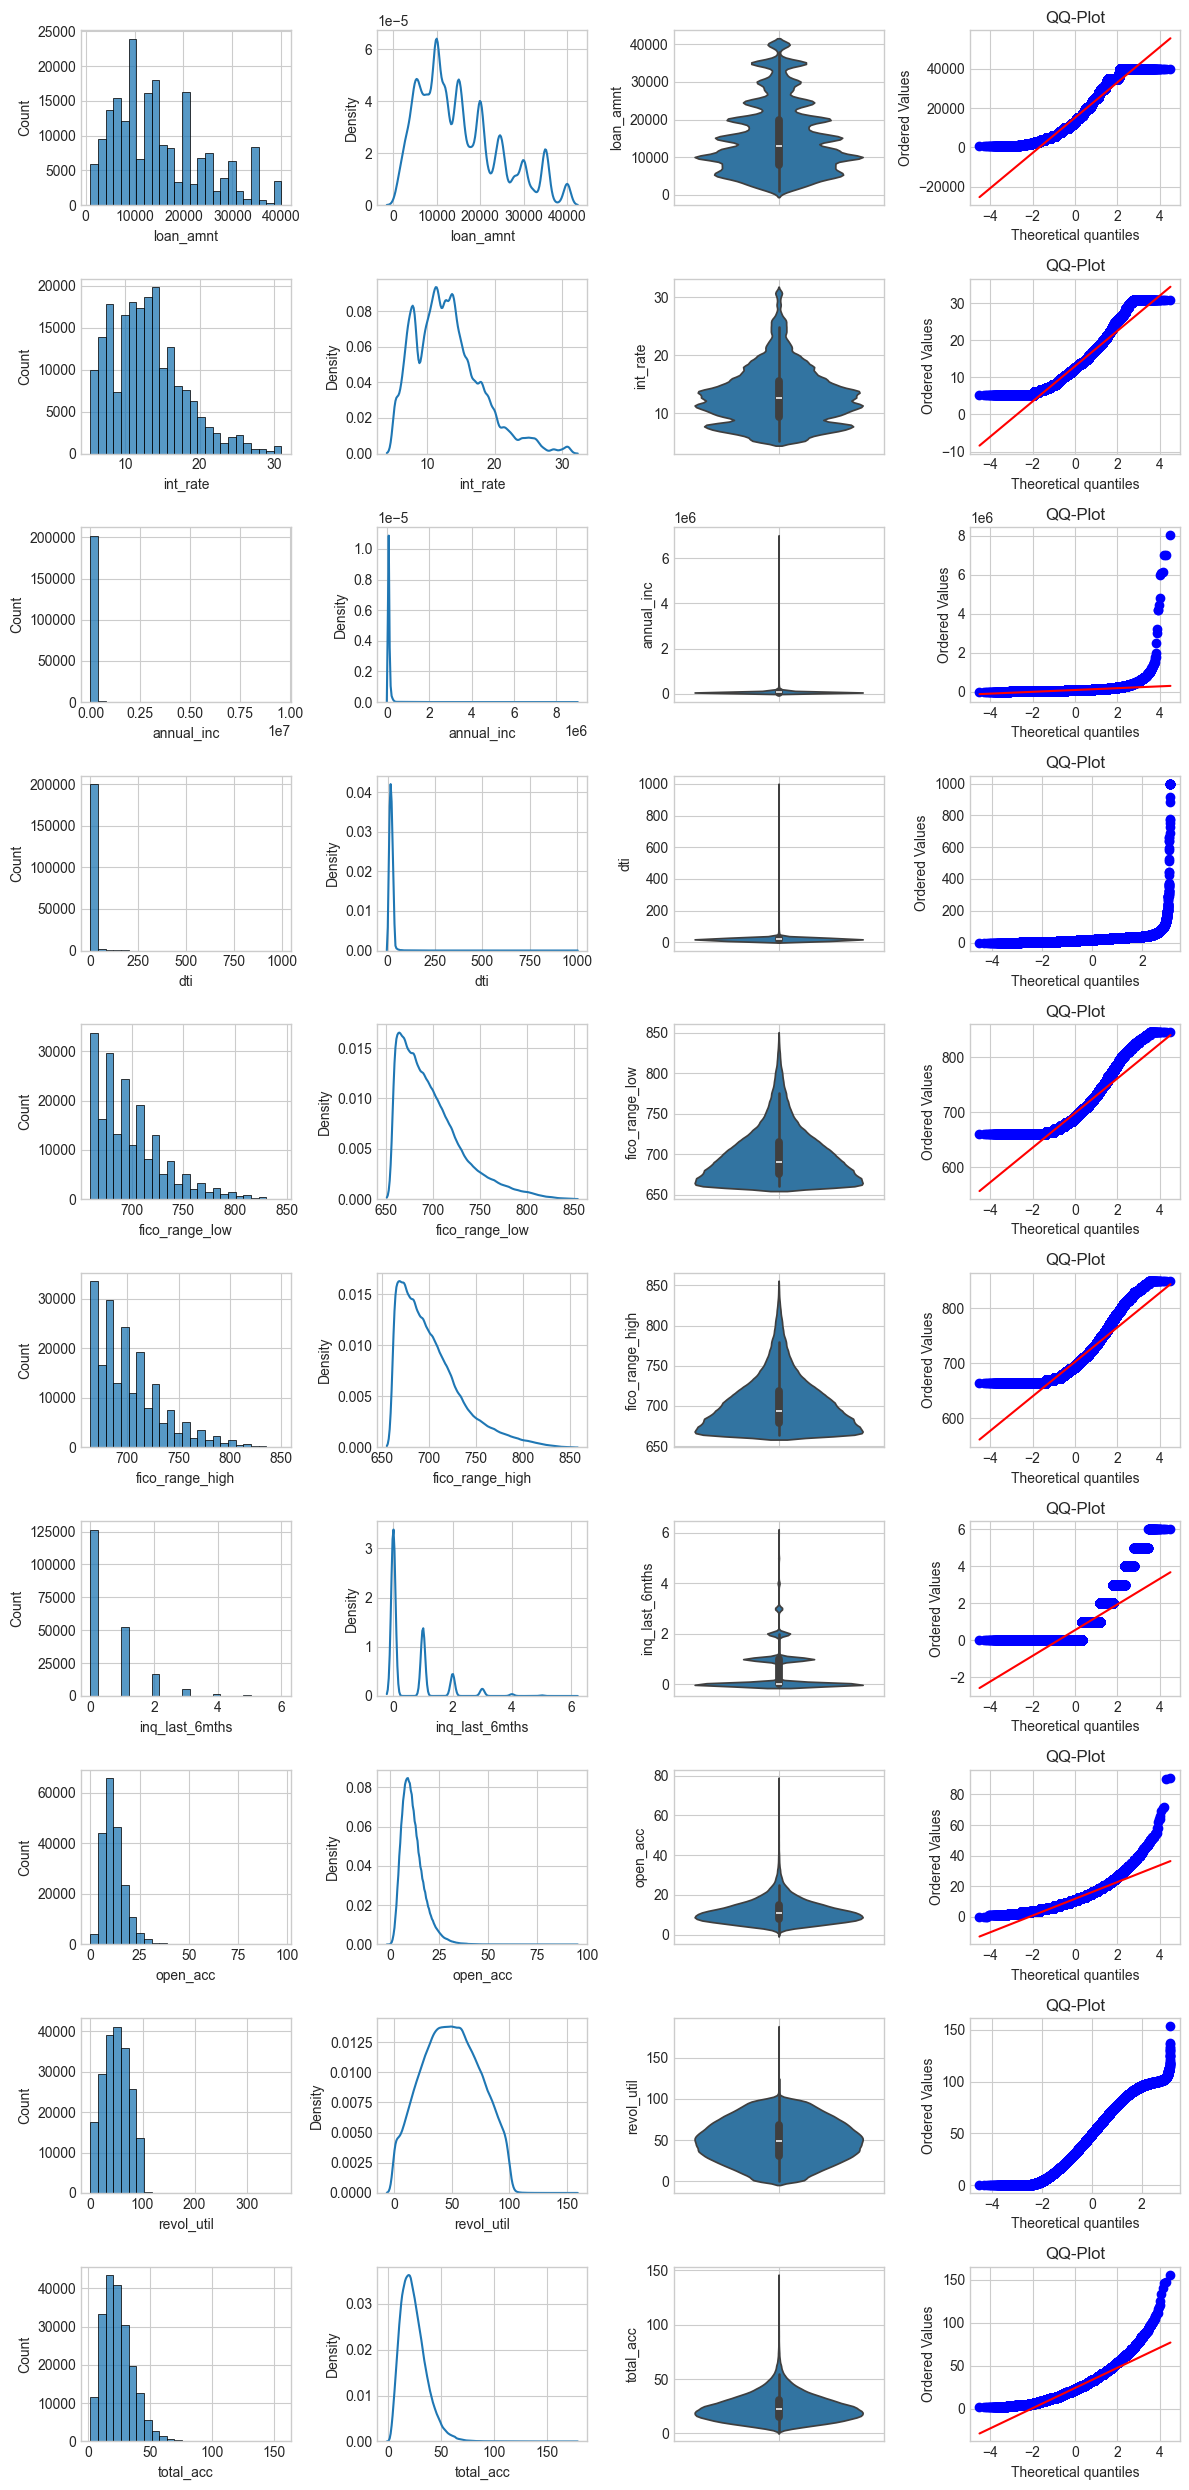

In [7]:
ncols = 4
nrows = len(df[numeric_cols].columns)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2.5))
for ax, col in zip(axes, df[numeric_cols].columns.to_list()):
    sns.histplot(df[col].sample(frac=0.1), bins=25, ax=ax[0])               # Sample! Plot only a fraction of the entire data set.
    sns.kdeplot(df[col].sample(frac=0.1), warn_singular=False, ax=ax[1])    # ...
    sns.violinplot(df[col].sample(frac=0.1), ax=ax[2])                      # ...
    stats.probplot(df[col].sample(frac=0.1), plot=ax[3])                    # ...
    ax[3].set_title("QQ-Plot")
    ax[0].grid(True)
    ax[1].grid(True)
    ax[2].grid(True)
    ax[3].grid(True)
plt.tight_layout()

In [8]:
non_numeric_stat = df[non_numeric_cols].describe()
non_numeric_stat.T

,count,unique,top,freq
term,2029952,2,36 months,1434328
emp_length,1892044,11,10+ years,677437
home_ownership,2029952,5,MORTGAGE,995479
purpose,2029952,14,debt_consolidation,1146650
addr_state,2029952,51,CA,276361
loan_status,2029952,7,Fully Paid,1239089


In [9]:
# Identify high cardinality features
threshold = 15 
high_cardinality_features = dict()

for feature in non_numeric_stat.columns:
    unique_values = non_numeric_stat.loc['unique', feature]
    if unique_values > threshold: 
        high_cardinality_features[feature] = unique_values

high_cardinality_features

{'addr_state': 51}

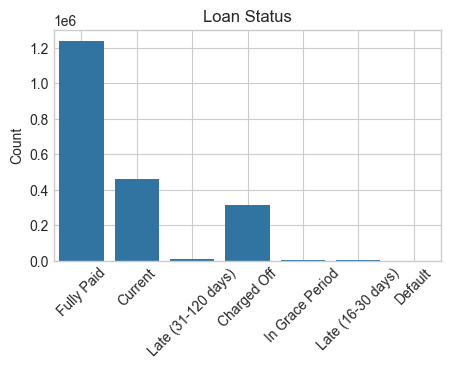

In [10]:
# Analyze distribution of target variable
plt.rcParams['figure.figsize'] = (5, 3)
sns.countplot(df, x=target).set_xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Loan Status')
plt.grid(True)
plt.show()

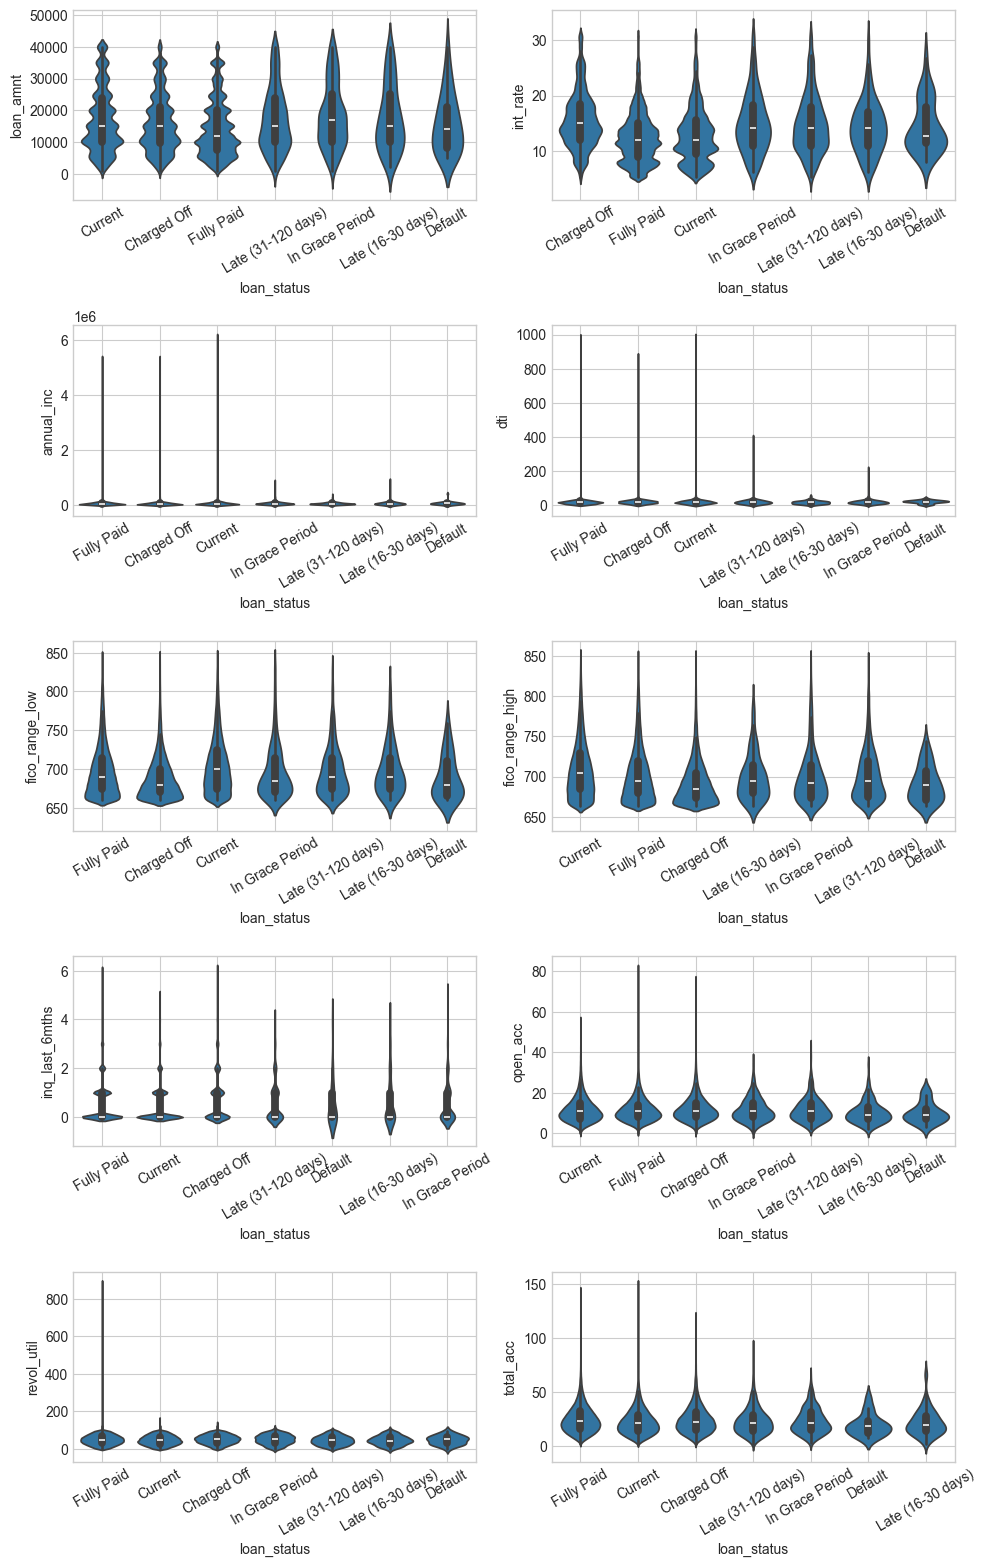

In [11]:
# Analyze target-feature relationship (prelim)
ncols = 2
nrows = (len(df[numeric_cols].columns) // ncols) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))
for ax, col in zip(axes.flatten(), df[numeric_cols].columns.to_list()):
    sns.violinplot(data=df.sample(frac=0.1), y=col, x=target, ax=ax)    # Sample! Plot only a fraction of the entire data set.
    ax.grid(True)
    plt.setp(ax.get_xticklabels(), rotation=30)
for ax in axes.flatten()[len(df[numeric_cols].columns):]:
    fig.delaxes(ax)
plt.tight_layout()

### Clean Data

At minimum, the following should be done:

* Handle Misssing Values:
    * Identify Missingness Mechanism:
        * Visualization using `missingno` (noramlity doesn't hold to use Little's MCAR test)
    * Strategize Imputation or Removal:
        * Calculate the missing values proportion. If low remove; otherwise, impute
* Handle outliers:
    * First decide removing outliers makes sense for which features, then use appropriate method to remove them



In [12]:
from pyampute.exploration.mcar_statistical_tests import MCARTest
import missingno as msno

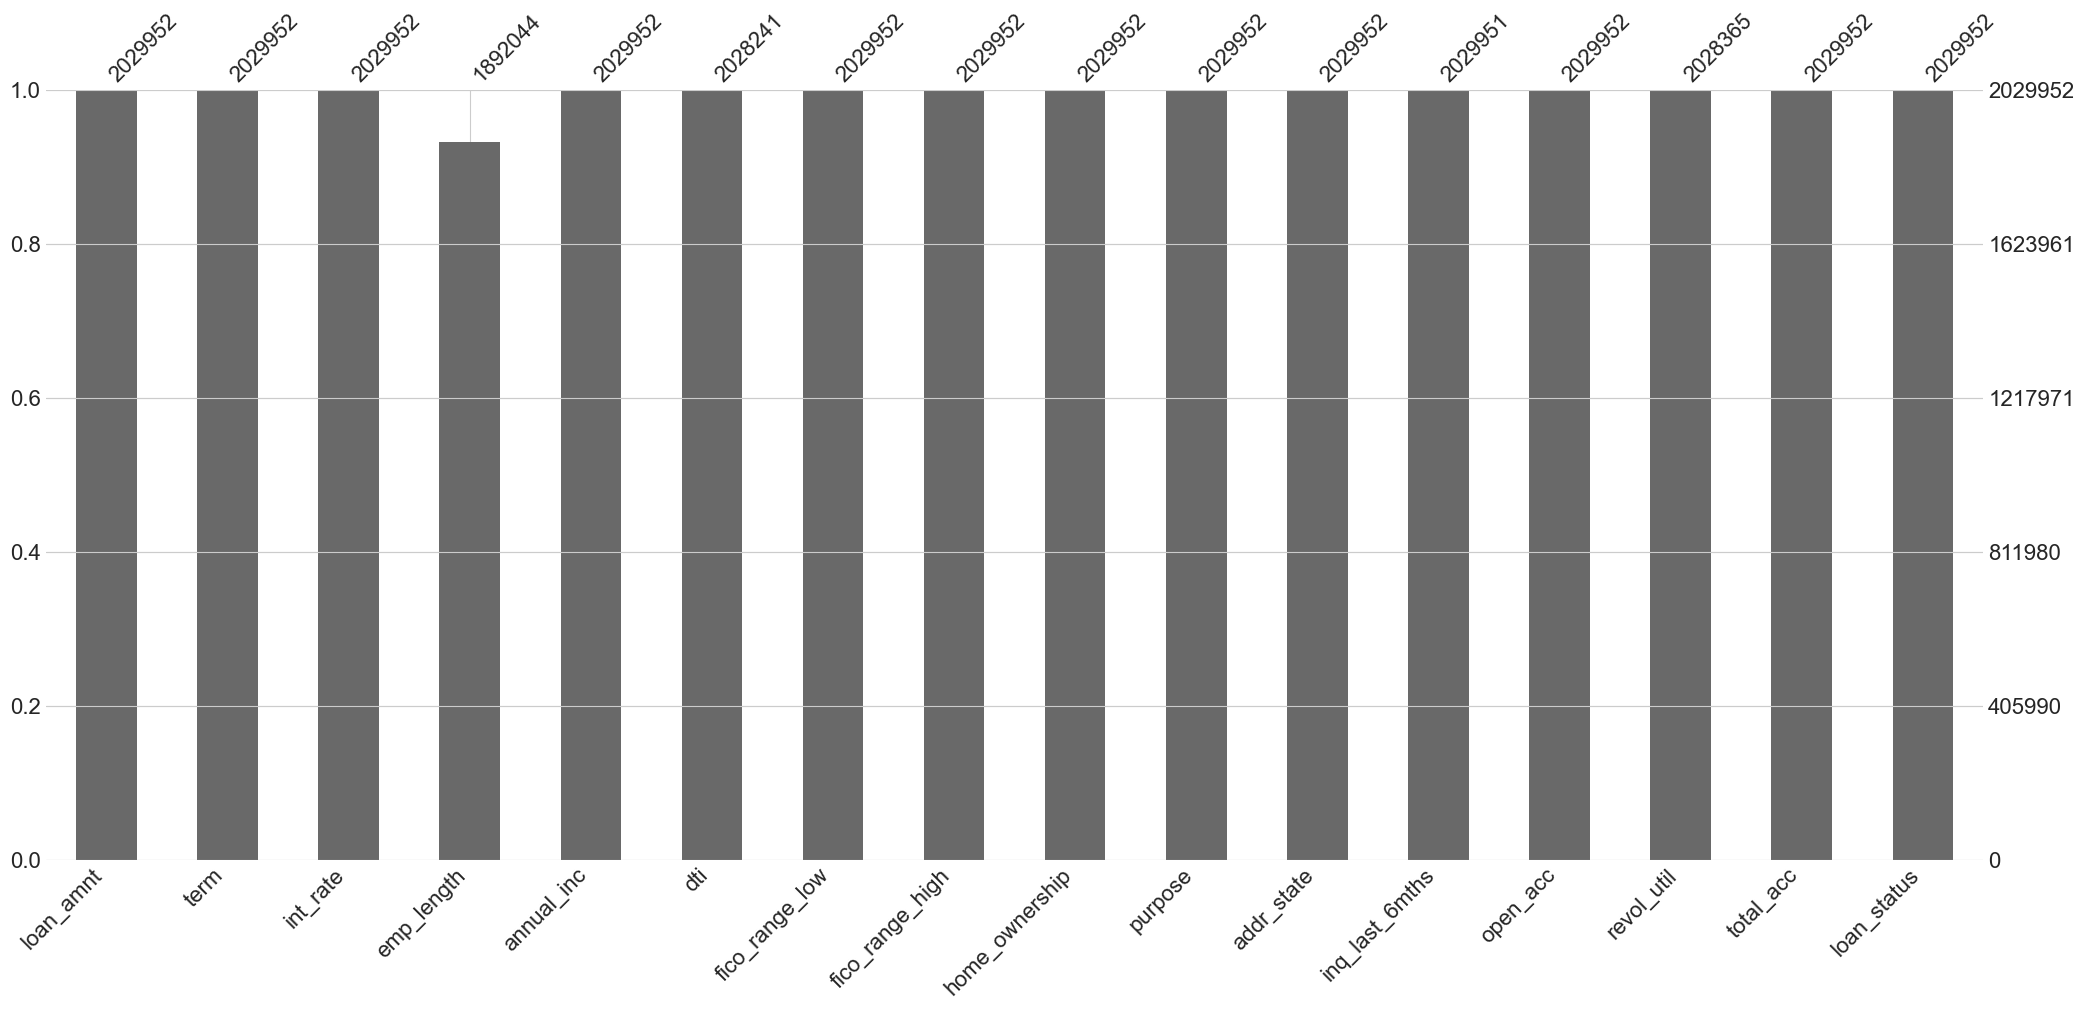

In [13]:
# Visually inspect missingness
# df.shape = (2029952, 17)
msno.bar(df)
plt.show()

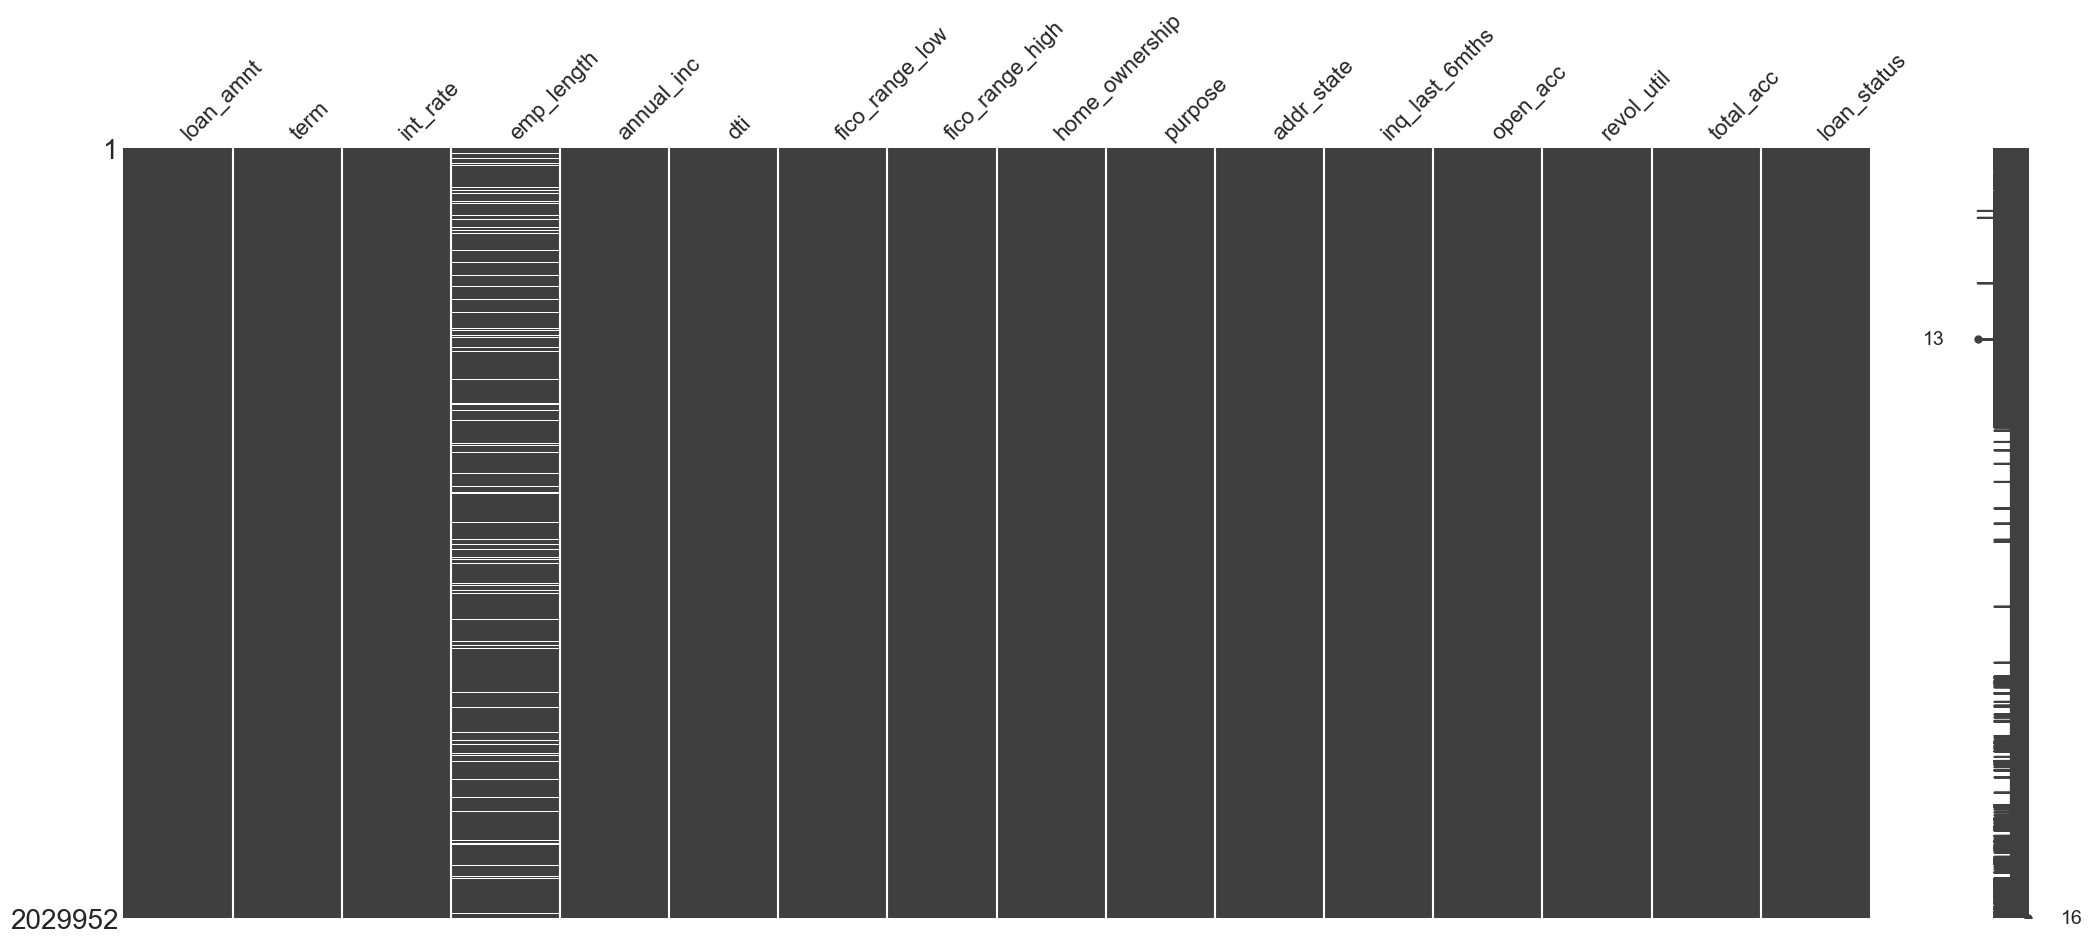

In [14]:
## From missingno documentation:  
# The sparkline at right summarizes the general shape of the 
# data completeness and points out the rows with the maximum
# and minimum nullity in the dataset.
# Link: https://github.com/ResidentMario/missingno?tab=readme-ov-file
msno.matrix(df)
plt.show()

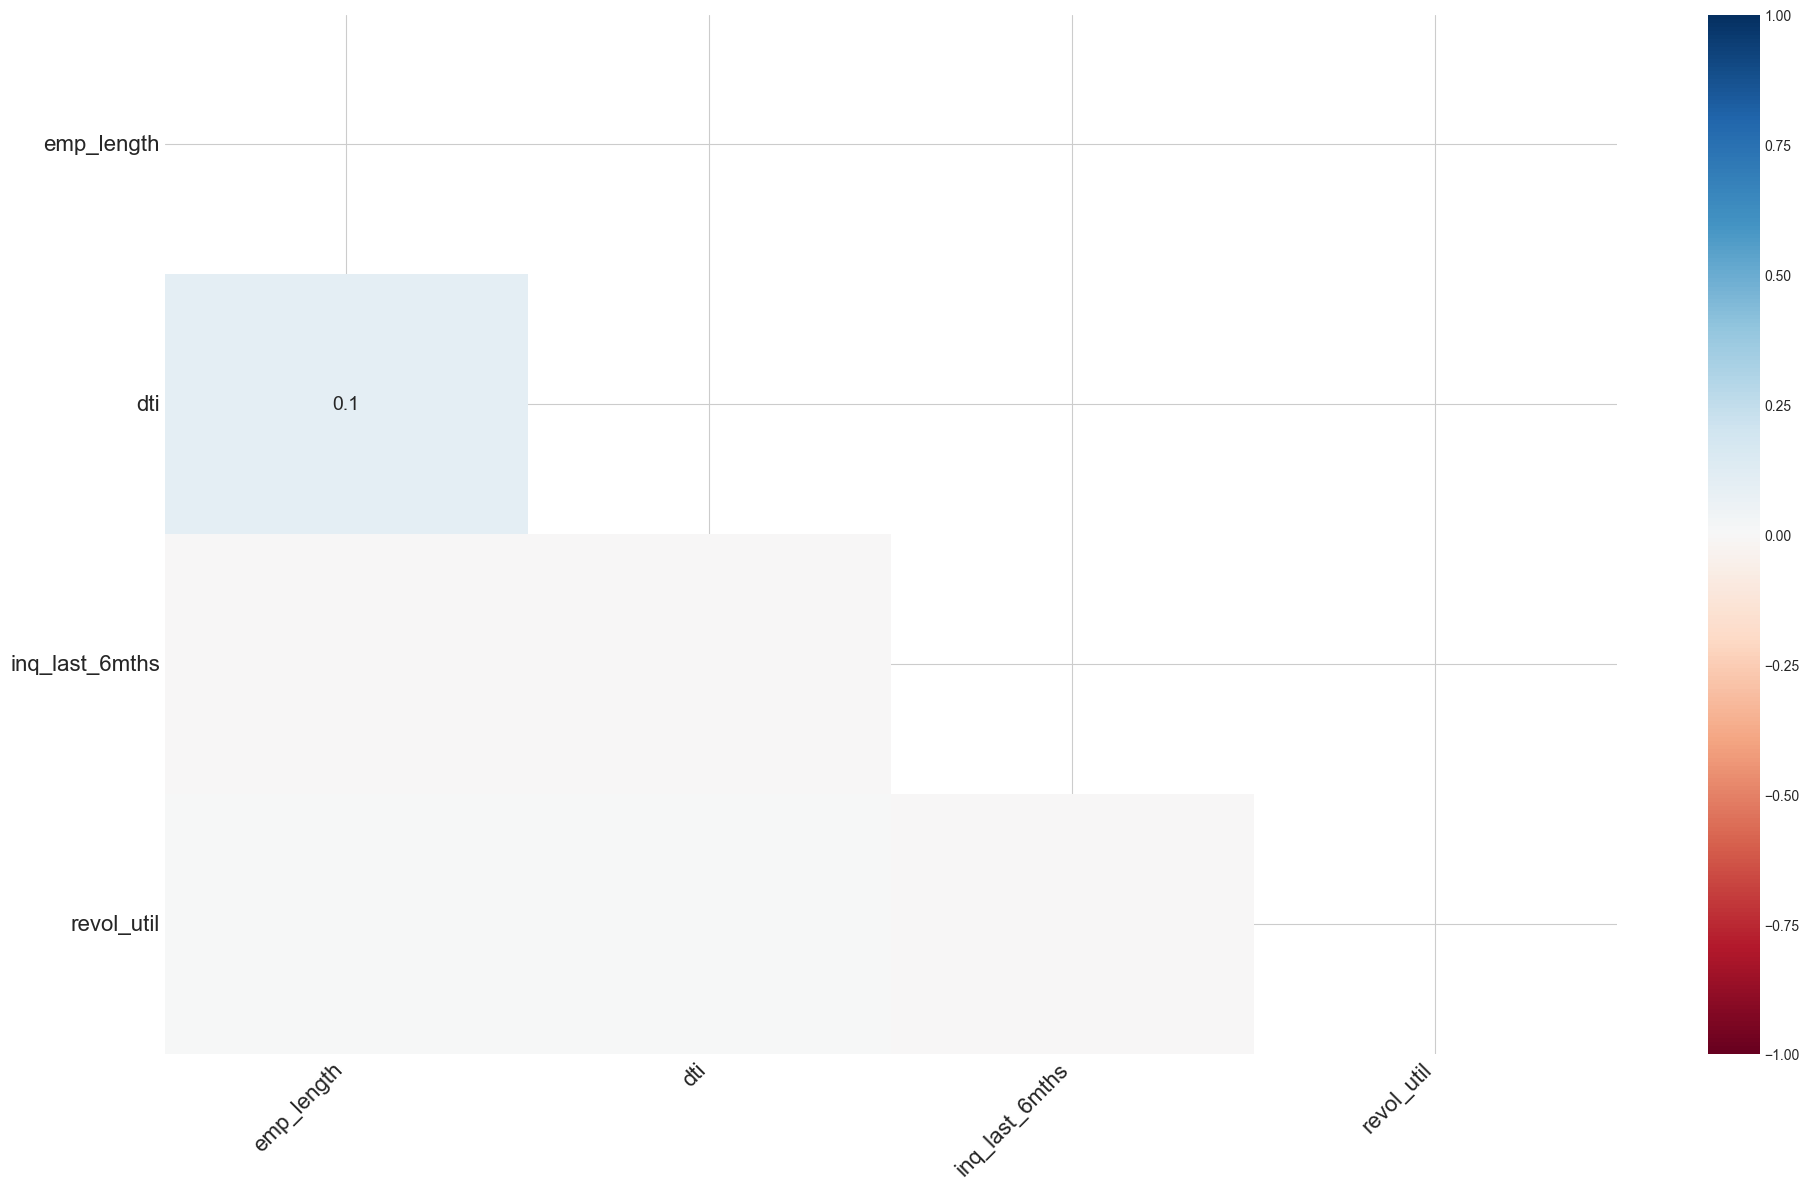

In [15]:
## From missingno documentation: 
# The missingno correlation heatmap measures nullity correlation: 
# how strongly the presence or absence of one variable affects the
# presence of another
# Link: https://github.com/ResidentMario/missingno?tab=readme-ov-file
msno.heatmap(df)
plt.tight_layout()

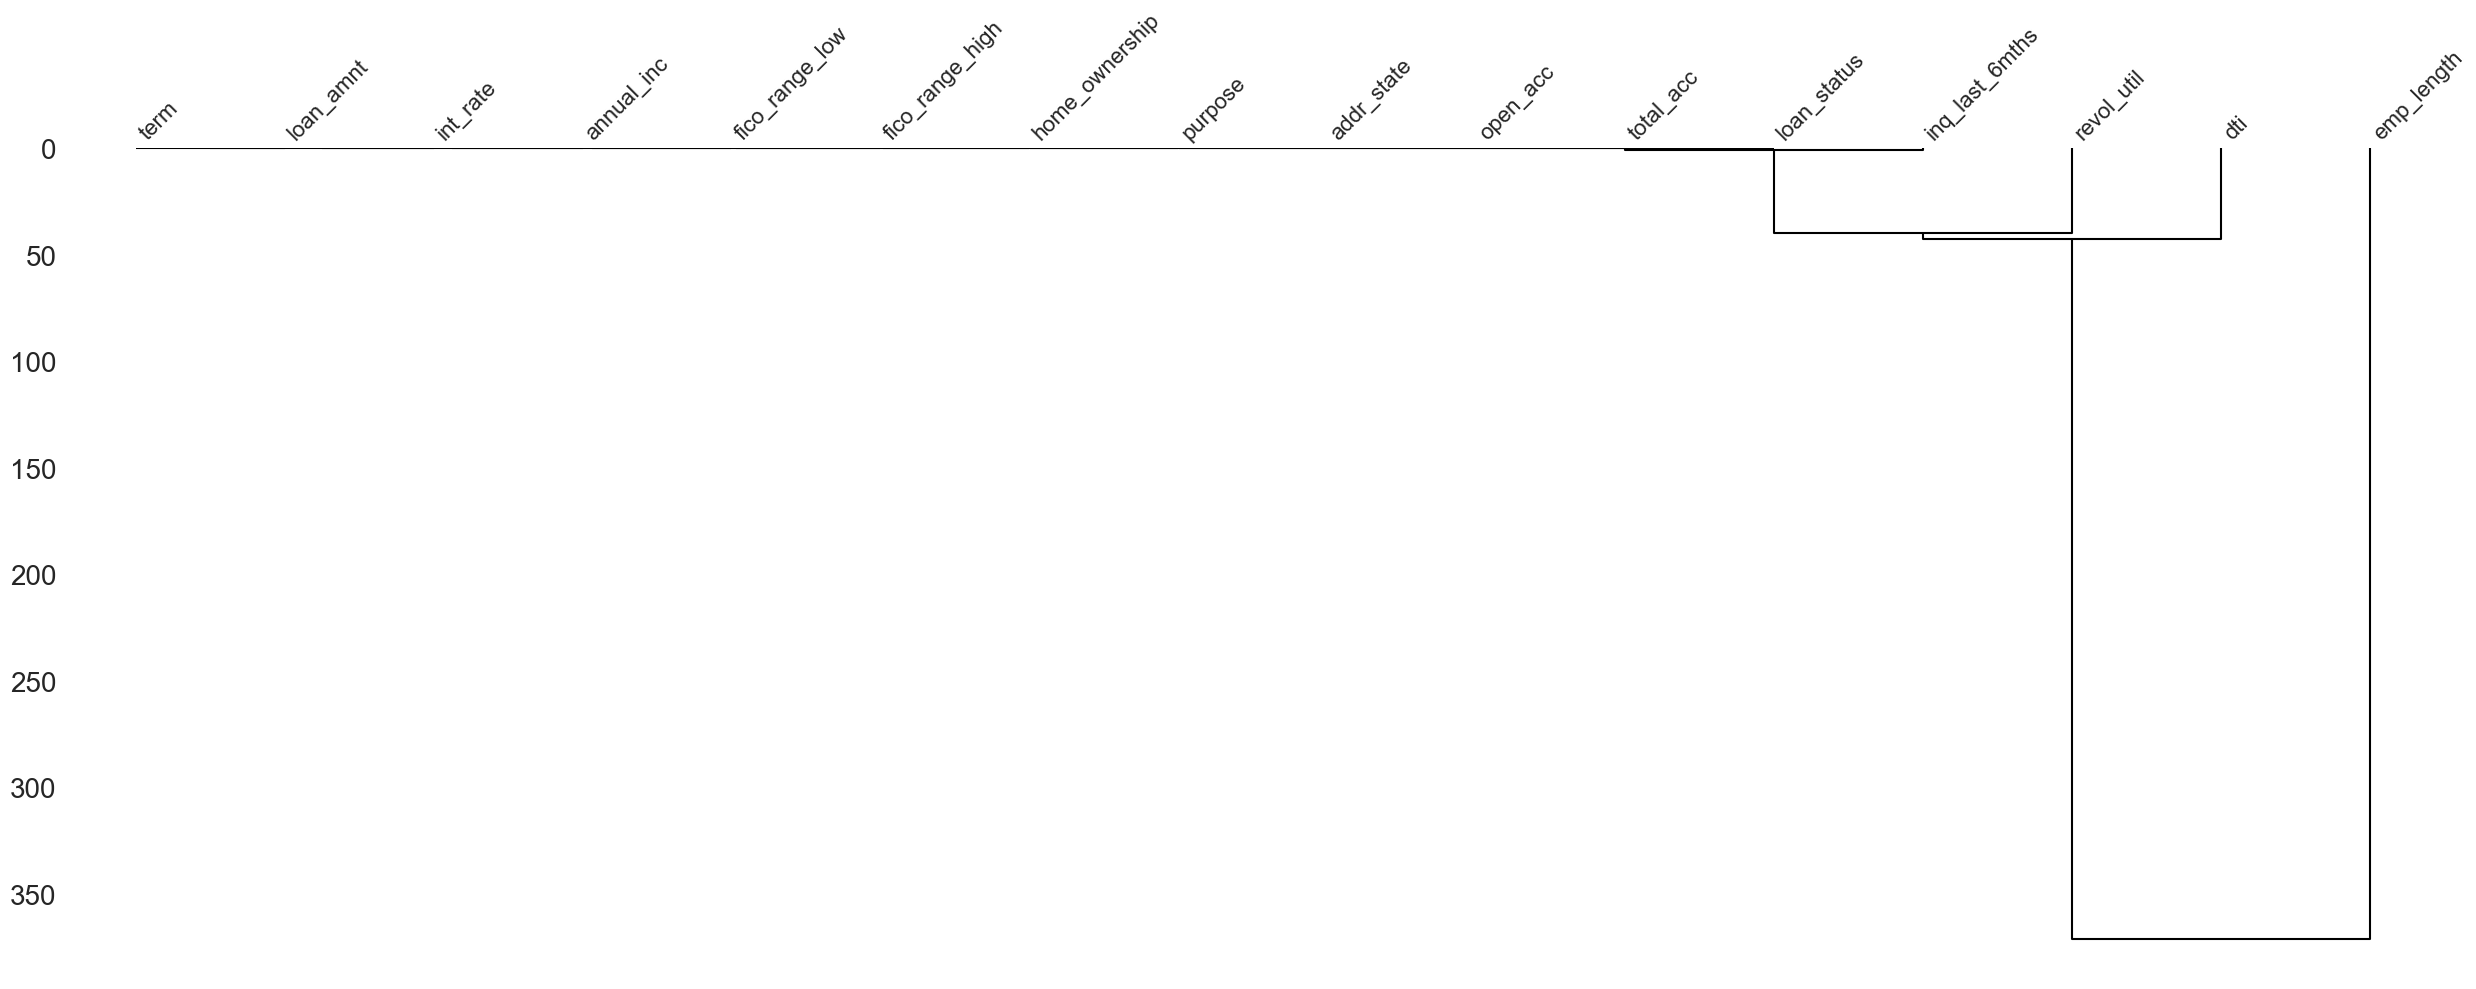

In [16]:
## From missingno documentation:
# The dendrogram allows you to more fully correlate variable completion, revealing
# trends deeper than the pairwise ones visible in the correlation heatmap.
# Link: https://github.com/ResidentMario/missingno?tab=readme-ov-file
msno.dendrogram(df)
plt.tight_layout()

In [17]:
# Identify columns with missing values and their count
cols_with_nan = df.columns[df.isnull().any()]
df[cols_with_nan].isnull().sum()

emp_length        137908
dti                 1711
inq_last_6mths         1
revol_util          1587
dtype: int64

In [18]:
# Caculate missing values proportion
df[cols_with_nan].isnull().mean().round(2)


emp_length        0.07
dti               0.00
inq_last_6mths    0.00
revol_util        0.00
dtype: float64

In [19]:
# Remove missing values
df_clean = df.dropna()
df_clean[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1890488.0,15414.963438,9329.091740,1000.00,8000.00,13500.00,20025.00,4.000000e+04
int_rate,1890488.0,12.988475,4.868444,5.31,9.44,12.61,15.61,3.099000e+01
annual_inc,1890488.0,80819.319275,120258.057407,0.00,49000.00,68000.00,96000.00,1.100000e+08
dti,1890488.0,18.848916,12.164656,-1.00,12.01,17.95,24.66,9.990000e+02
fico_range_low,1890488.0,698.235178,32.824216,660.00,675.00,690.00,715.00,8.450000e+02
fico_range_high,1890488.0,702.235352,32.824996,664.00,679.00,694.00,719.00,8.500000e+02
inq_last_6mths,1890488.0,0.547573,0.847953,0.00,0.00,0.00,1.00,6.000000e+00
open_acc,1890488.0,11.827301,5.752913,1.00,8.00,11.00,15.00,1.010000e+02
revol_util,1890488.0,49.926359,24.596136,0.00,31.20,49.70,68.70,8.923000e+02
total_acc,1890488.0,24.305134,12.095744,2.00,15.00,22.00,31.00,1.760000e+02


Identifying outliers:
* Some of features are coming from a defined range e.g., FICO score, number of inquiries (max of 6), etc. so it does NOT make much sense to define outliers for them. We identify outliers for the following features only:
    * `annual_inc`
    * `dti`
    * `open_acc`
    * `revol_util`
    * `total_acc`


In [20]:
# Calculate Q1, Q3, and IQR
outlier_candidates = ['annual_inc', 'dti', 'open_acc', 'revol_util','total_acc']
Q1 = df_clean[outlier_candidates].quantile(0.25)
Q3 = df_clean[outlier_candidates].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper whiskers
lower_whisker = np.maximum(Q1 - 1.5 * IQR, df_clean[outlier_candidates].min())
upper_whisker = np.minimum(Q3 + 1.5 * IQR, df_clean[outlier_candidates].max())

# Apply the filtering using a lambda function
filtered_df = df_clean[outlier_candidates].apply(lambda col: col[(col > lower_whisker[col.name]) & (col < upper_whisker[col.name])])

In [21]:
# Double check the number of NaNs created by filtering
filtered_df.isnull().mean()

annual_inc    0.050431
dti           0.008819
open_acc      0.027624
revol_util    0.005514
total_acc     0.021199
dtype: float64

In [22]:
# Remove NaNs from filtering
filtered_df.dropna(inplace=True)

In [23]:
# Remove outliers
df_clipped = df_clean.loc[filtered_df.index]
df_clipped["inq_last_6mths"] = df_clipped["inq_last_6mths"].astype(int)
df_clipped

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,fico_range_low,fico_range_high,home_ownership,purpose,addr_state,inq_last_6mths,open_acc,revol_util,total_acc,loan_status
0,12000.0,36 months,7.97,10+ years,42000.0,27.74,715.0,719.0,OWN,debt_consolidation,CA,0,9.0,37.0,16.0,Fully Paid
1,32000.0,36 months,11.99,10+ years,155000.0,12.35,715.0,719.0,MORTGAGE,credit_card,NJ,1,20.0,34.1,42.0,Current
2,40000.0,60 months,15.05,9 years,120000.0,31.11,765.0,769.0,MORTGAGE,debt_consolidation,TX,0,12.0,20.7,26.0,Current
3,16000.0,36 months,7.97,5 years,79077.0,15.94,700.0,704.0,RENT,debt_consolidation,VA,0,12.0,57.7,20.0,Current
4,33000.0,36 months,7.21,< 1 year,107000.0,19.06,785.0,789.0,MORTGAGE,debt_consolidation,TX,0,25.0,16.1,52.0,Late (31-120 days)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029947,24000.0,60 months,23.99,< 1 year,107000.0,11.65,670.0,674.0,RENT,other,CO,1,13.0,24.9,24.0,Charged Off
2029948,10000.0,36 months,7.99,10+ years,65000.0,19.55,725.0,729.0,MORTGAGE,debt_consolidation,PA,0,15.0,15.7,27.0,Fully Paid
2029949,10050.0,36 months,16.99,8 years,37000.0,20.56,705.0,709.0,RENT,debt_consolidation,VA,1,15.0,47.0,21.0,Charged Off
2029950,6000.0,36 months,11.44,5 years,41000.0,19.99,670.0,674.0,RENT,credit_card,NY,0,9.0,10.1,18.0,Fully Paid


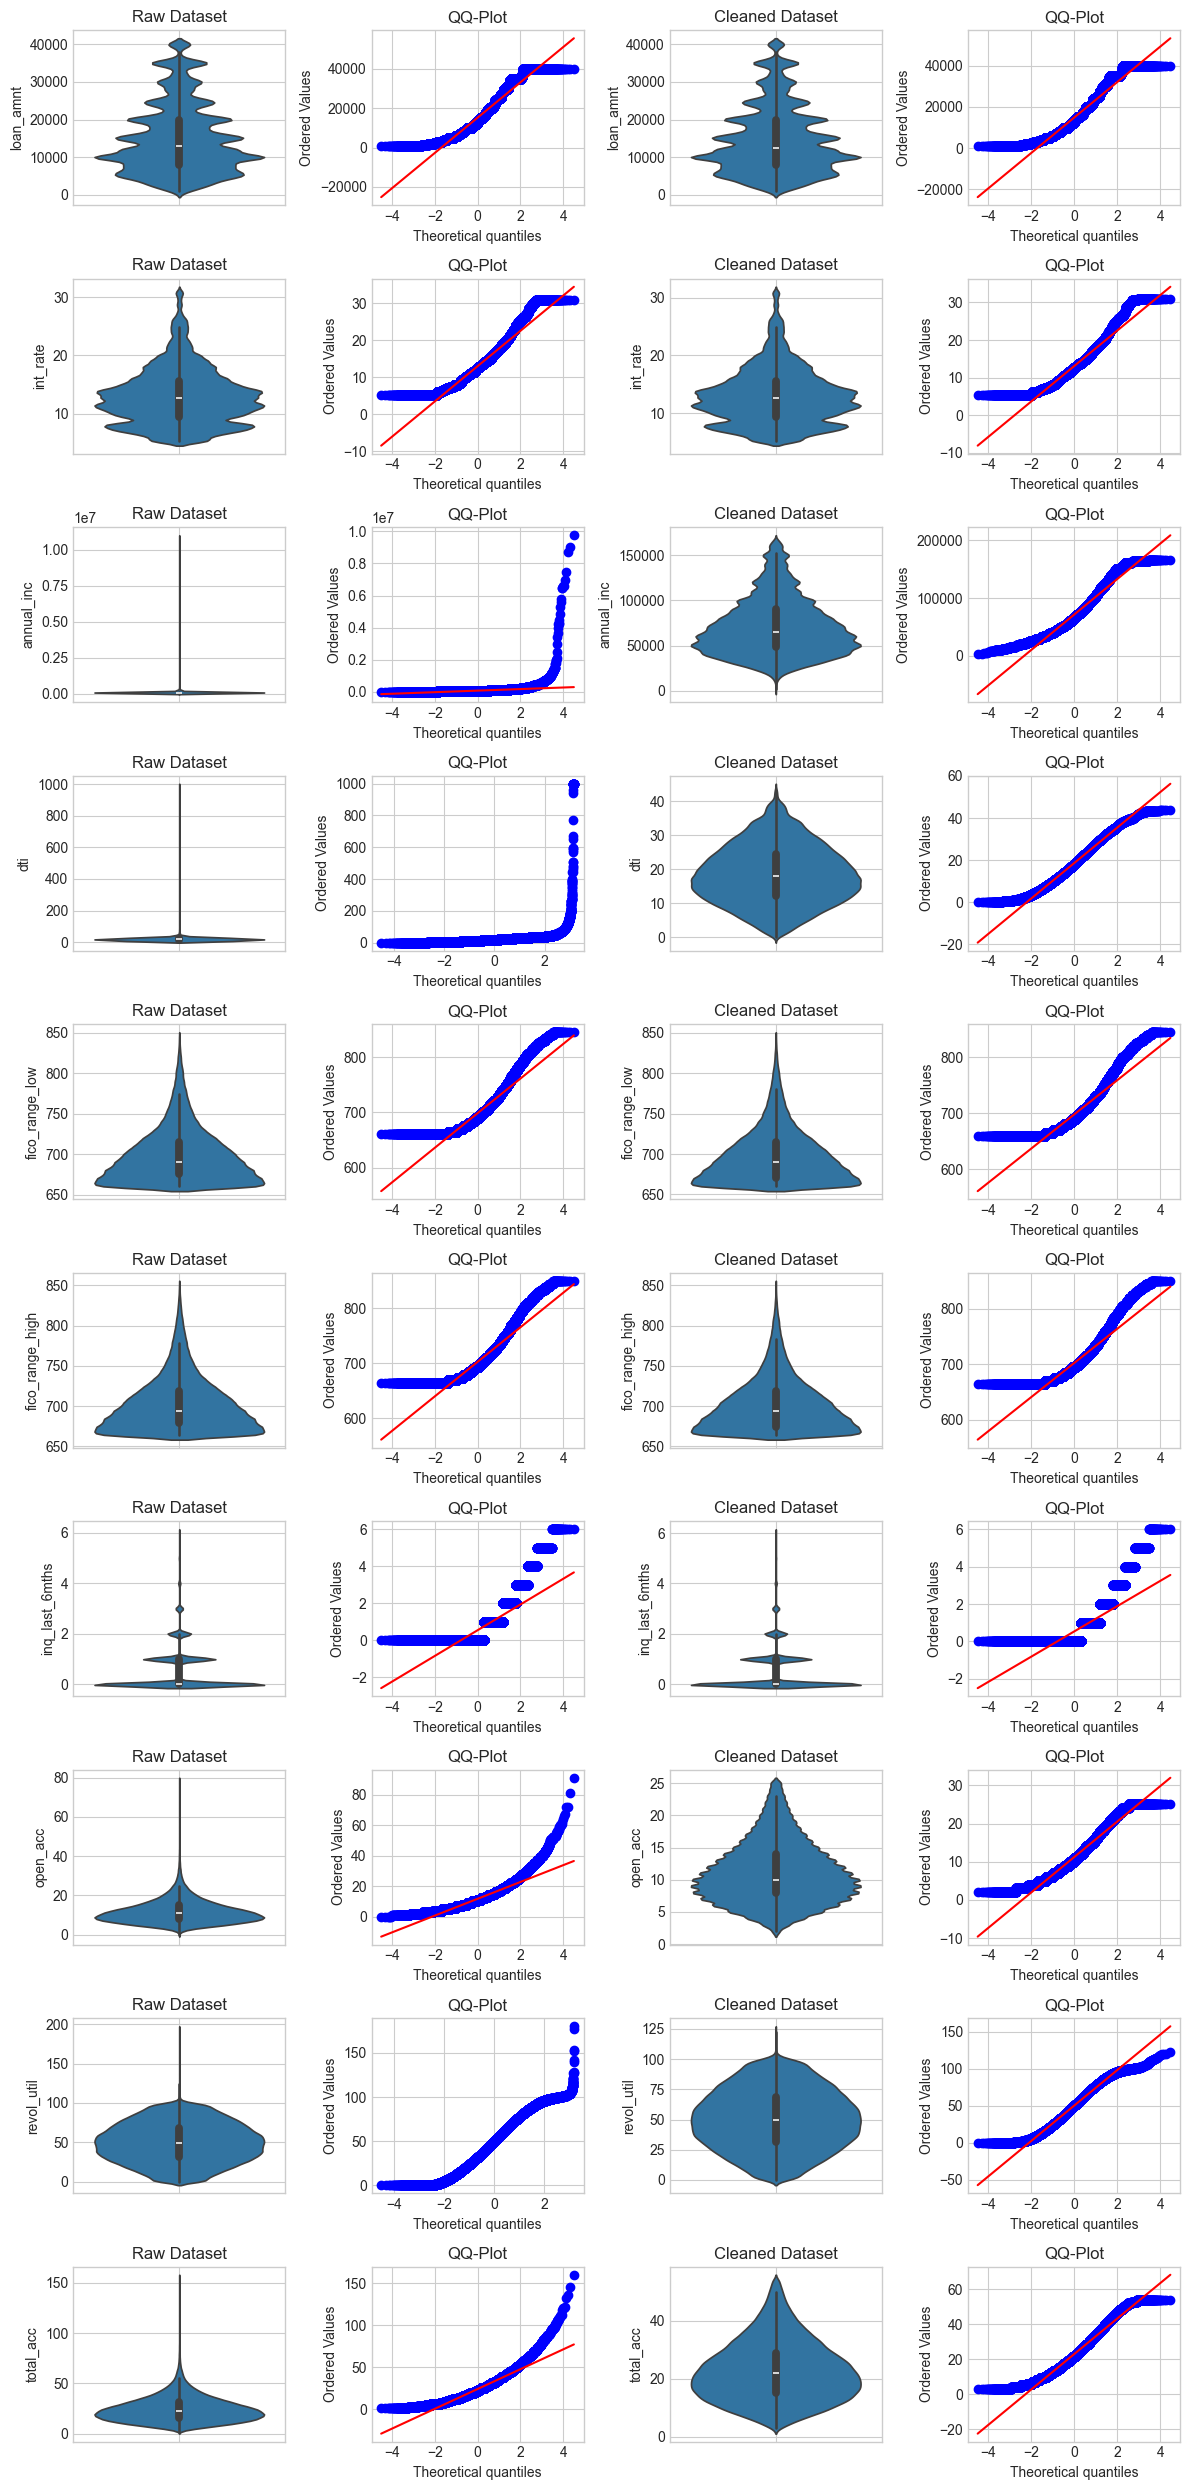

In [24]:
ncols = 4
nrows = len(df[numeric_cols].columns)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2.5))
for ax, col in zip(axes, df[numeric_cols].columns.to_list()):
    sns.violinplot(df[col].sample(frac=0.1), ax=ax[0])                      # Sample! Plot only a fraction of the entire data set.
    stats.probplot(df[col].sample(frac=0.1), plot=ax[1])                    # ...
    sns.violinplot(df_clipped[col].sample(frac=0.1), ax=ax[2])              # ...
    stats.probplot(df_clipped[col].sample(frac=0.1), plot=ax[3])            # ...
    ax[0].set_title("Raw Dataset")
    ax[1].set_title("QQ-Plot")
    ax[2].set_title("Cleaned Dataset")
    ax[3].set_title("QQ-Plot")
    ax[0].grid(True)
    ax[1].grid(True)
    ax[2].grid(True)
    ax[3].grid(True)
plt.tight_layout()

### Transform Data

At minimum, the following should be done:

* Handle Categorical Variables:
    * Analyze cardinality
    * Choose encoding strategies
* Data Scaling

In [25]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_extraction import FeatureHasher

In [26]:
df_clipped.select_dtypes(exclude='number').describe().T

,count,unique,top,freq
term,1702460,2,36 months,1200491
emp_length,1702460,11,10+ years,606741
home_ownership,1702460,5,MORTGAGE,816467
purpose,1702460,14,debt_consolidation,970507
addr_state,1702460,51,CA,233003
loan_status,1702460,7,Fully Paid,1054588


In [27]:
# High cardinality features (from Step 1: Understand Data Distribution): addr_state 
# It is crucial for final analysis so we keep it
high_cardinality_features

{'addr_state': 51}

In [28]:
# Apply feature hashing for addr_state
high_cardinality_feature = 'addr_state'
n_features = 10
hashed_features_col_names = ['_'.join([high_cardinality_feature, str(i)]) for i in range(n_features)]

hasher = FeatureHasher(n_features=n_features, input_type="string")
hashed_features = hasher.fit_transform(df_clipped[high_cardinality_feature].apply(lambda x: [x])).toarray()

hashed_features, hashed_features.shape

(array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., -1.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 (1702460, 10))

In [29]:
df_transformed = df_clipped.copy()
df_transformed.drop(columns=[high_cardinality_feature], inplace=True)
df_transformed[hashed_features_col_names] = hashed_features

df_transformed[hashed_features_col_names].isnull().sum()

addr_state_0    0
addr_state_1    0
addr_state_2    0
addr_state_3    0
addr_state_4    0
addr_state_5    0
addr_state_6    0
addr_state_7    0
addr_state_8    0
addr_state_9    0
dtype: int64

In [30]:
# Use ordinal encoding for employment length
ordinal_feature = 'emp_length'
categories = [['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']]

encoder = OrdinalEncoder(categories=categories)
encoded_feature = encoder.fit_transform(df_transformed[[ordinal_feature]])
encoded_df = pd.DataFrame(encoded_feature, columns=encoder.get_feature_names_out([ordinal_feature]))

df_transformed.loc[:, [ordinal_feature]] = encoded_df[ordinal_feature].values
df_transformed[ordinal_feature].isnull().sum()

0

In [31]:
df_transformed.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,fico_range_low,fico_range_high,home_ownership,purpose,...,addr_state_0,addr_state_1,addr_state_2,addr_state_3,addr_state_4,addr_state_5,addr_state_6,addr_state_7,addr_state_8,addr_state_9
0,12000.0,36 months,7.97,10.0,42000.0,27.74,715.0,719.0,OWN,debt_consolidation,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32000.0,36 months,11.99,10.0,155000.0,12.35,715.0,719.0,MORTGAGE,credit_card,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2,40000.0,60 months,15.05,9.0,120000.0,31.11,765.0,769.0,MORTGAGE,debt_consolidation,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16000.0,36 months,7.97,5.0,79077.0,15.94,700.0,704.0,RENT,debt_consolidation,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33000.0,36 months,7.21,0.0,107000.0,19.06,785.0,789.0,MORTGAGE,debt_consolidation,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# One-hot encode the rest
def one_hot_encode_feature(df, col_name):
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_data = encoder.fit_transform(df[[col_name]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col_name]))
    df[encoded_df.columns.to_list()] = encoded_df.values
    df.drop(columns=[col_name], inplace=True)
    return df

for feature in ['home_ownership', 'purpose', 'term']:
    print(f"One-hot encoding '{feature}'")
    df_transformed = one_hot_encode_feature(df_transformed, feature)

print(f"\nNaN's (entire df_transformed): {df_transformed.isnull().sum().sum()}")

One-hot encoding 'home_ownership'
One-hot encoding 'purpose'
One-hot encoding 'term'

NaN's (entire df_transformed): 0


In [33]:
df_transformed.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_util,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,12000.0,7.97,10.0,42000.0,27.74,715.0,719.0,0,9.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,32000.0,11.99,10.0,155000.0,12.35,715.0,719.0,1,20.0,34.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,40000.0,15.05,9.0,120000.0,31.11,765.0,769.0,0,12.0,20.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,16000.0,7.97,5.0,79077.0,15.94,700.0,704.0,0,12.0,57.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33000.0,7.21,0.0,107000.0,19.06,785.0,789.0,0,25.0,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# Label encode target
le = LabelEncoder()
encoded_target = le.fit_transform(df_transformed[target].values.ravel())
df_transformed[target] = encoded_target
df_transformed[target].isnull().sum()

0

In [ ]:
# Standardize encoded dataset:
# We use standardization since numerical features are NOT significanlty off from Normal
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transformed)
df_scaled = pd.DataFrame(df_scaled, columns=df_transformed.columns)
df_scaled

,loan_amnt,int_rate,emp_length,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,revol_util,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,-0.310408,-1.045659,1.090403,-0.924562,1.078327,0.534637,0.534620,-0.638253,-0.454128,-0.546536,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
1,1.930954,-0.215304,1.090403,2.648462,-0.729150,0.534637,0.534620,0.567314,1.864779,-0.665969,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
2,2.827499,0.416757,0.822260,1.541773,1.474116,2.072887,2.072834,-0.638253,0.178301,-1.217832,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,-1.546468,1.546468
3,0.137864,-1.045659,-0.250312,0.247801,-0.307523,0.073162,0.073155,-0.638253,0.178301,0.305970,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
4,2.043023,-1.202642,-1.591027,1.130717,0.058905,2.688187,2.688119,-0.638253,2.918829,-1.407278,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702455,1.034409,2.263368,-1.591027,1.130717,-0.811361,-0.849788,-0.849773,0.567314,0.389111,-1.044860,...,-0.148968,-0.11004,-0.082561,3.906074,-0.024854,-0.098898,-0.083764,-0.003066,-1.546468,1.546468
1702456,-0.534545,-1.041528,1.090403,-0.197310,0.116453,0.842287,0.842262,-0.638253,0.810730,-1.423752,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
1702457,-0.528941,0.817476,0.554117,-1.082661,0.235073,0.226987,0.226977,0.567314,0.810730,-0.134697,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635
1702458,-0.982817,-0.328910,-0.250312,-0.956182,0.168129,-0.849788,-0.849773,-0.638253,-0.454128,-1.654381,...,-0.148968,-0.11004,-0.082561,-0.256012,-0.024854,-0.098898,-0.083764,-0.003066,0.646635,-0.646635


In [36]:
df_scaled.isnull().sum().sum()

0

### Gain Deeper Insights

At minimum, the following should be done:

* Analyze Relationships:
    * Predictor-Target
    * Predictor-Predictor
    * Assess multicollinearity
* Feature Selection & Importance Analysis

In [37]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif

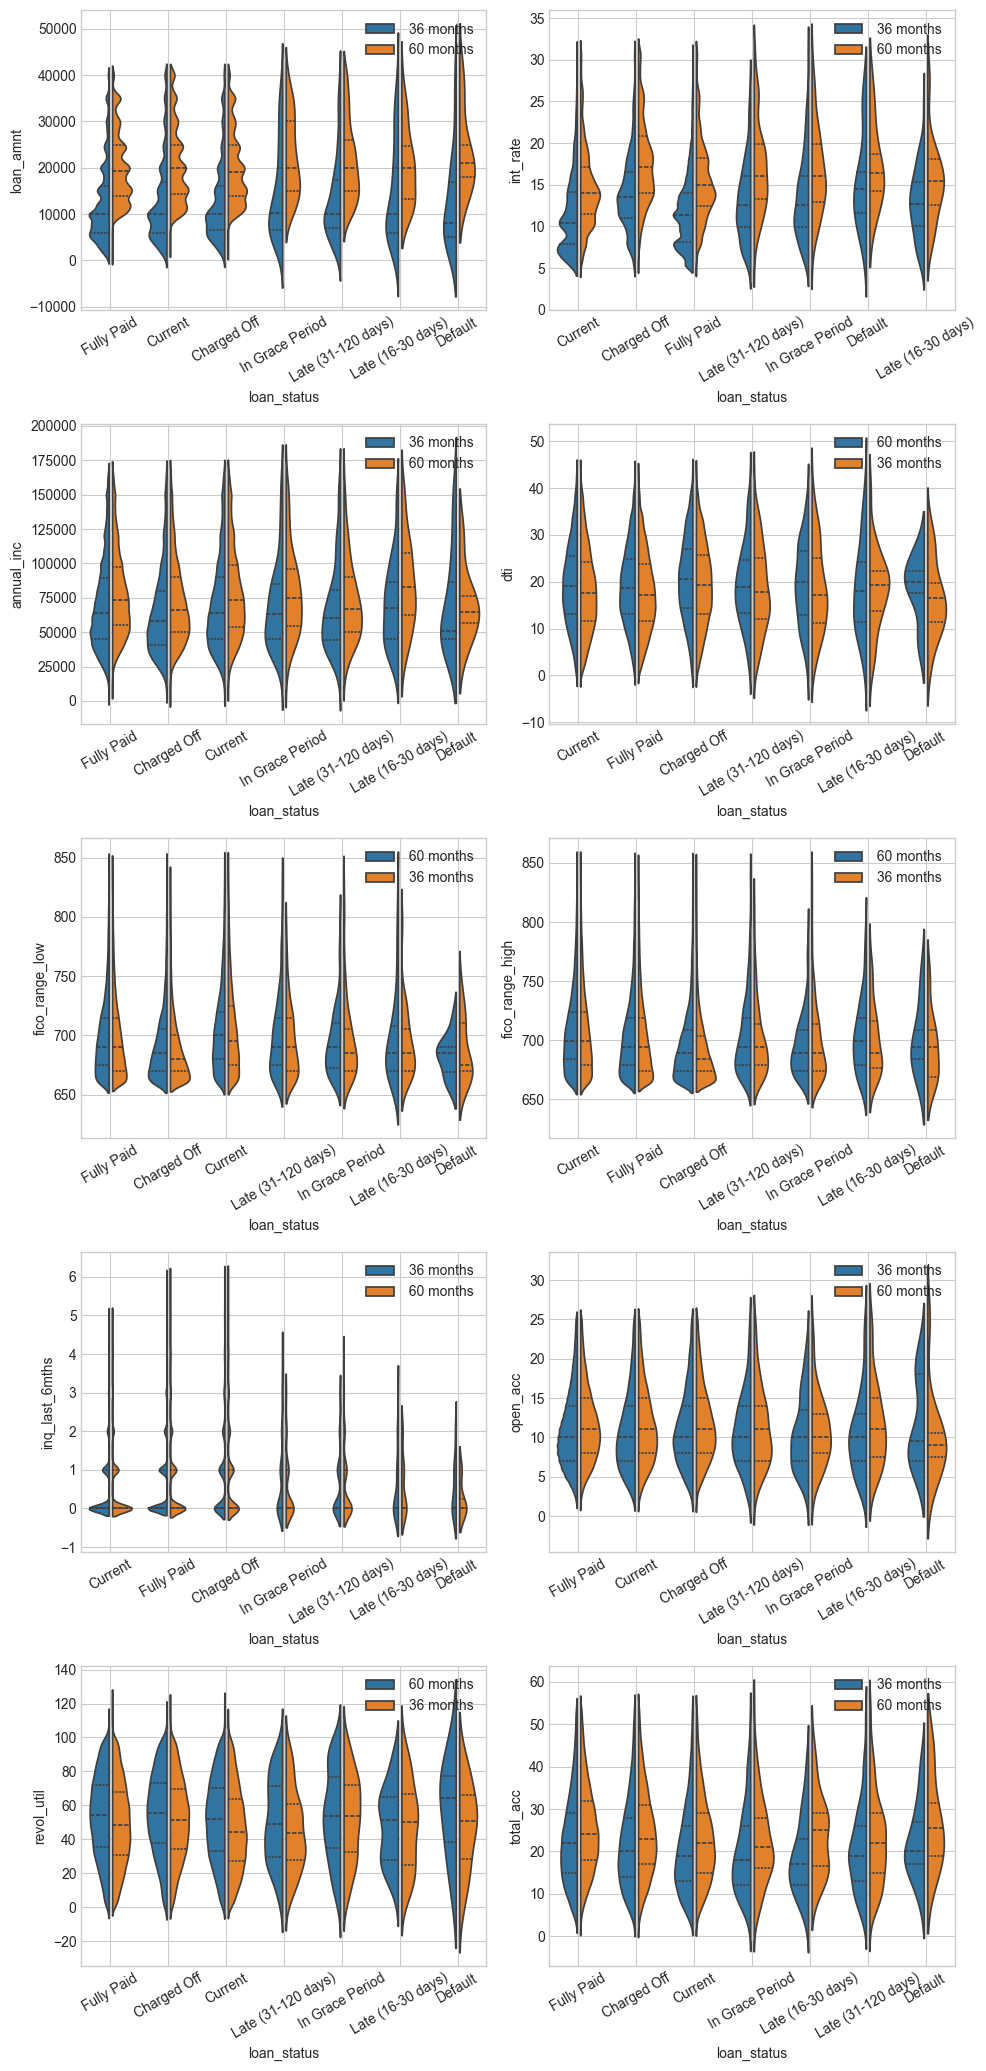

In [38]:
# Analyze Predictor-Target relationship: Use clipped data (after cleaning & before transformation and scaling)
ncols = 2
nrows = (len(df_clipped[numeric_cols].columns) // ncols) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*4))
for ax, col in zip(axes.flatten(), df_clipped[numeric_cols].columns.to_list()):
    sns.violinplot(data=df_clipped.sample(frac=0.1), y=col, x=target, 
                   hue='term', split=True, inner="quart", gap=.15, ax=ax)
    ax.grid(True)
    ax.legend(loc='upper right')
    plt.setp(ax.get_xticklabels(), rotation=30)
for ax in axes.flatten()[len(df_clipped[numeric_cols].columns):]:
    fig.delaxes(ax)
plt.tight_layout()

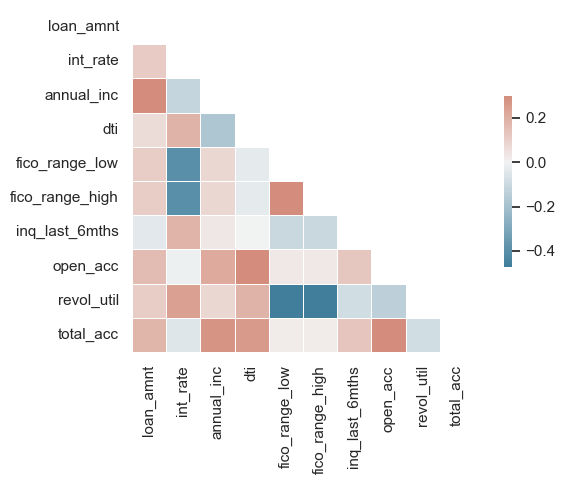

In [39]:
# Analyze Predictor-Predictor relationship
# ---
# Code source: seaborn documentation: Plotting a diagonal correlation matrix
# Link: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# ---
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_clipped[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()

In [40]:
# Calculate VIF for each independent variable
vif = pd.DataFrame()
features = [col for col in df_scaled.columns if col != target]
vif["Feature"] = features
vif["VIF"] = [variance_inflation_factor(df_scaled[features].values, i) for i in range(df_scaled[features].shape[1])]
vif

c:\Users\QZ8YA2\AppData\Local\anaconda3\envs\deep-dive-ds\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\QZ8YA2\AppData\Local\anaconda3\envs\deep-dive-ds\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\QZ8YA2\AppData\Local\anaconda3\envs\deep-dive-ds\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\QZ8YA2\AppData\Local\anaconda3\envs\deep-dive-ds\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\QZ8YA2\AppData\Local\anaconda3\envs\deep-dive-ds\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by z

,Feature,VIF
0,loan_amnt,1.608508e+00
1,int_rate,1.710055e+00
2,emp_length,1.062567e+00
3,annual_inc,1.602091e+00
4,dti,1.419739e+00
5,fico_range_low,6.381553e+06
6,fico_range_high,6.381505e+06
7,inq_last_6mths,1.108923e+00
8,open_acc,2.072409e+00
9,revol_util,1.596228e+00


In [41]:
# Treat multicollinearity by dropping a reference category for categorical variables
ref_categories = ['home_ownership_NONE', 'purpose_major_purchase', 'term_ 36 months', 'fico_range_low']

# Calculate VIF for each independent variable
vif = pd.DataFrame()
features = [col for col in df_scaled.columns if col not in ref_categories + [target]]
vif["Feature"] = features
vif["VIF"] = [variance_inflation_factor(df_scaled[features].values, i) for i in range(df_scaled[features].shape[1])]
vif

,Feature,VIF
0,loan_amnt,1.608497
1,int_rate,1.709799
2,emp_length,1.062560
3,annual_inc,1.602079
4,dti,1.419485
5,fico_range_high,1.637509
6,inq_last_6mths,1.108920
7,open_acc,2.072407
8,revol_util,1.596153
9,total_acc,2.059488


In [42]:
# Treat multicollinearity by dropping a reference category for categorical variables
ref_categories = ['purpose_debt_consolidation', 'term_ 36 months', 'fico_range_low'] + [col for col in df_scaled.columns if col.startswith('home')]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
features = [col for col in df_scaled.columns if col not in ref_categories + [target]]
vif["Feature"] = features
vif["VIF"] = [variance_inflation_factor(df_scaled[features].values, i) for i in range(df_scaled[features].shape[1])]
vif

,Feature,VIF
0,loan_amnt,1.607018
1,int_rate,1.705045
2,emp_length,1.037283
3,annual_inc,1.580094
4,dti,1.419343
5,fico_range_high,1.628433
6,inq_last_6mths,1.108603
7,open_acc,2.072136
8,revol_util,1.587374
9,total_acc,2.031413


In [43]:
# Fit SelectKBest to the data
selector = SelectKBest(f_classif, k=3)
selector.fit(df_scaled[features], df_scaled[target])

# Get the boolean mask of selected features
selected_mask = selector.get_support()

# Get the names of the selected features
selected_feature_names = df_scaled[features].columns[selected_mask]

print(selected_feature_names.values)

['int_rate' 'fico_range_high' 'term_ 60 months']
